Step 1: Data Loading & Cleaning

In [1]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('../data/US_Accidents.csv')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,08-02-2016 00:37,08-02-2016 06:37,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,08-02-2016 05:56,08-02-2016 11:56,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,08-02-2016 06:15,08-02-2016 12:15,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,08-02-2016 06:15,08-02-2016 12:15,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,08-02-2016 06:51,08-02-2016 12:51,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1048575 non-null  object 
 1   Severity               1048575 non-null  int64  
 2   Start_Time             1048575 non-null  object 
 3   End_Time               1048575 non-null  object 
 4   Start_Lat              1048575 non-null  float64
 5   Start_Lng              1048575 non-null  float64
 6   End_Lat                1048575 non-null  float64
 7   End_Lng                1048575 non-null  float64
 8   Distance(mi)           1048575 non-null  float64
 9   Description            1048575 non-null  object 
 10  Number                 360065 non-null   float64
 11  Street                 1048575 non-null  object 
 12  Side                   1048575 non-null  object 
 13  City                   1048506 non-null  object 
 14  County            

In [3]:
null_columns = df.columns[df.isnull().any()].tolist()
print(null_columns)

['Number', 'City', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


In [4]:
null_percent = (df.isnull().sum() / len(df)) * 100
null_percent = null_percent[null_percent > 0].sort_values(ascending=False)
null_percent

Number                   65.661493
Precipitation(in)        24.723172
Wind_Chill(F)            22.373316
Wind_Speed(mph)           6.476408
Humidity(%)               3.125384
Wind_Direction            2.960494
Visibility(mi)            2.938750
Temperature(F)            2.931884
Weather_Condition         2.885821
Pressure(in)              2.428057
Weather_Timestamp         2.109053
Airport_Code              0.253487
Timezone                  0.110054
Zipcode                   0.046635
City                      0.006580
Sunrise_Sunset            0.006580
Civil_Twilight            0.006580
Nautical_Twilight         0.006580
Astronomical_Twilight     0.006580
dtype: float64

In [5]:
#new column which gives percentage of missins values in the row
df['null_prct'] = df.isnull().mean(axis=1) * 100

In [6]:
df[df['null_prct'] > 50]

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,null_prct


as there is no row with too many missing values no row will be deleted

In [7]:
df.drop(columns='null_prct', inplace=True)

In [8]:
low_missing_cols = null_percent[null_percent < 5].index.tolist()

In [9]:
for col in low_missing_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [10]:
df[low_missing_cols].isnull().sum()

Humidity(%)              0
Wind_Direction           0
Visibility(mi)           0
Temperature(F)           0
Weather_Condition        0
Pressure(in)             0
Weather_Timestamp        0
Airport_Code             0
Timezone                 0
Zipcode                  0
City                     0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
dtype: int64

In [11]:
null_percent = (df.isnull().sum() / len(df)) * 100
null_percent = null_percent[null_percent > 0].sort_values(ascending=False)
null_percent

Number               65.661493
Precipitation(in)    24.723172
Wind_Chill(F)        22.373316
Wind_Speed(mph)       6.476408
dtype: float64

In [12]:
df = df.drop(columns='Number')

In [13]:
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].median())
df['Wind_Chill(F)'] = df['Wind_Chill(F)'].fillna(df['Wind_Chill(F)'].median())
df['Wind_Speed(mph)'] = df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].median())

In [14]:
df.isnull().sum().sum()

np.int64(0)

In [15]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.corr()


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
Severity,1.000000,0.102724,0.147875,0.102722,0.147883,0.129148,-0.000800,-0.051041,0.029839,0.049658,0.000826,0.056114,0.005938
Start_Lat,0.102724,1.000000,-0.074693,0.999995,-0.074686,0.049486,-0.475134,-0.481353,0.031160,-0.191503,-0.084274,0.024583,-0.000184
Start_Lng,0.147875,-0.074693,1.000000,-0.074695,0.999999,0.073167,0.007448,-0.026307,0.179233,0.183569,0.012482,0.139384,0.019936
End_Lat,0.102722,0.999995,-0.074695,1.000000,-0.074689,0.049532,-0.475132,-0.481353,0.031158,-0.191507,-0.084271,0.024580,-0.000183
End_Lng,0.147883,-0.074686,0.999999,-0.074689,1.000000,0.073179,0.007451,-0.026305,0.179231,0.183571,0.012483,0.139381,0.019935
Distance(mi),0.129148,0.049486,0.073167,0.049532,0.073179,1.000000,-0.038041,-0.049120,0.029299,-0.020414,-0.014498,0.005997,-0.001121
Temperature(F),-0.000800,-0.475134,0.007448,-0.475132,0.007451,-0.038041,1.000000,0.896998,-0.375290,0.164085,0.189002,0.114151,-0.002367
Wind_Chill(F),-0.051041,-0.481353,-0.026307,-0.481353,-0.026305,-0.049120,0.896998,1.000000,-0.308587,0.132828,0.166125,0.024090,-0.001455
Humidity(%),0.029839,0.031160,0.179233,0.031158,0.179231,0.029299,-0.375290,-0.308587,1.000000,0.125584,-0.347022,-0.173968,0.053961
Pressure(in),0.049658,-0.191503,0.183569,-0.191507,0.183571,-0.020414,0.164085,0.132828,0.125584,1.000000,0.036064,-0.032930,0.005613


In [16]:
df[['Country']].value_counts()

Country
US         1048575
Name: count, dtype: int64

In [17]:
df = df.drop(columns='Country')

In [18]:
df[['Turning_Loop']].value_counts()

Turning_Loop
False           1048575
Name: count, dtype: int64

In [19]:
df = df.drop(columns='Turning_Loop')

In [20]:
# Not needed columns for ML model training : 'ID', 'Description', 'Street', 'Zipcode', 'End_Time', 'End_Lat', 'End_Lng', 'Airport_Code', 'Weather_Timestamp'
df = df.drop(columns=['ID', 'Description', 'Street', 'Zipcode', 'End_Time', 'End_Lat', 'End_Lng', 'Airport_Code', 'Weather_Timestamp'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 35 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Severity               1048575 non-null  int64  
 1   Start_Time             1048575 non-null  object 
 2   Start_Lat              1048575 non-null  float64
 3   Start_Lng              1048575 non-null  float64
 4   Distance(mi)           1048575 non-null  float64
 5   Side                   1048575 non-null  object 
 6   City                   1048575 non-null  object 
 7   County                 1048575 non-null  object 
 8   State                  1048575 non-null  object 
 9   Timezone               1048575 non-null  object 
 10  Temperature(F)         1048575 non-null  float64
 11  Wind_Chill(F)          1048575 non-null  float64
 12  Humidity(%)            1048575 non-null  float64
 13  Pressure(in)           1048575 non-null  float64
 14  Visibility(mi)    

In [22]:
df.columns

Index(['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)',
       'Side', 'City', 'County', 'State', 'Timezone', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [23]:
df['Start_Time'].value_counts()

Start_Time
37:00.0             370
36:00.0             363
42:00.0             359
22:00.0             358
02:00.0             354
                   ... 
10-12-2019 16:03      1
10-12-2019 15:26      1
10-12-2019 15:35      1
10-12-2019 15:29      1
10-12-2019 15:24      1
Name: count, Length: 420502, dtype: int64

In [24]:
df['Start_Time'].apply(lambda x: len(str(x).split('-'))).value_counts()

Start_Time
3    1013895
1      34680
Name: count, dtype: int64

In [25]:
df['Start_Time_new'] = pd.to_datetime(df['Start_Time'], errors='coerce', dayfirst=True)
print(df['Start_Time_new'].isna().sum())

34680


In [26]:
df['Start_Time'] = df['Start_Time_new']
df = df.drop(columns='Start_Time_new')

In [27]:
df['Start_Time'].isna().sum()

np.int64(34680)

In [28]:
df = df[df['Start_Time'].notna()].copy()

In [29]:
df.shape

(1013895, 35)

Step 2: Feature Engineering

In [30]:
df['Hour'] = df['Start_Time'].dt.hour
df['Day'] = df['Start_Time'].dt.day
df['Month'] = df['Start_Time'].dt.month
df['Weekday'] = df['Start_Time'].dt.weekday  # 0 = Monday, 6 = Sunday

In [31]:
binary_cols = df.select_dtypes(include='bool').columns.tolist()

In [32]:
print(binary_cols)

['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']


In [33]:
for col in binary_cols:
    df[col] = df[col].astype(int)

Step 3: Exploratory Data Analysis (EDA)

C:\Users\hp\AppData\Local\Temp\ipykernel_2644\1542104618.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Severity', data=df, palette='deep')


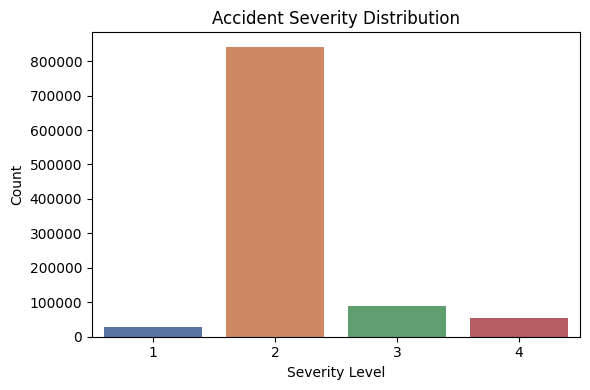

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='Severity', data=df, palette='deep')
plt.title('Accident Severity Distribution')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../visuals/severity_distribution.png') 
plt.show()

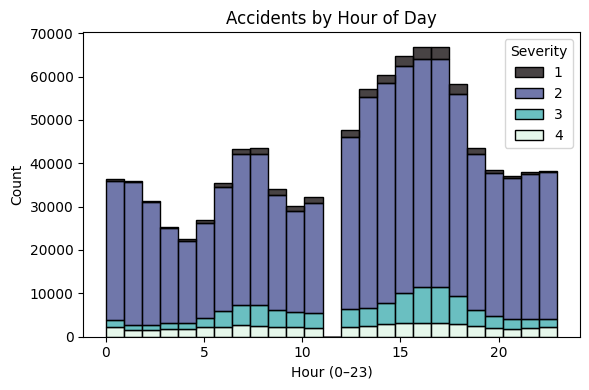

In [63]:
# Accidents by Time of Day
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Hour', hue='Severity', multiple='stack', bins=25, palette='mako')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour (0–23)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../visuals/Accidens_byHour.png') 
plt.show()

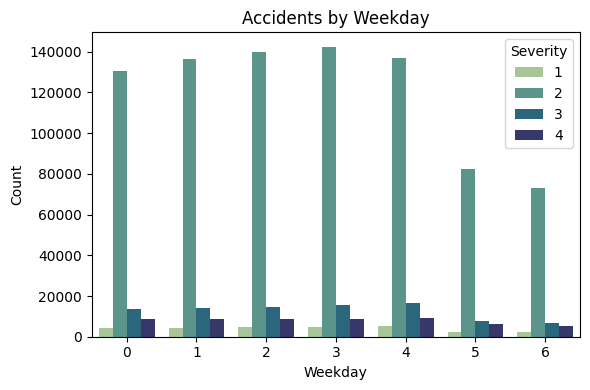

In [64]:
# Accidents by WeekDay
plt.figure(figsize=(6, 4))
sns.countplot(x='Weekday', hue='Severity', data=df, palette='crest')
plt.title('Accidents by Weekday')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../visuals/Accidens_byWeekday.png') 
plt.show()

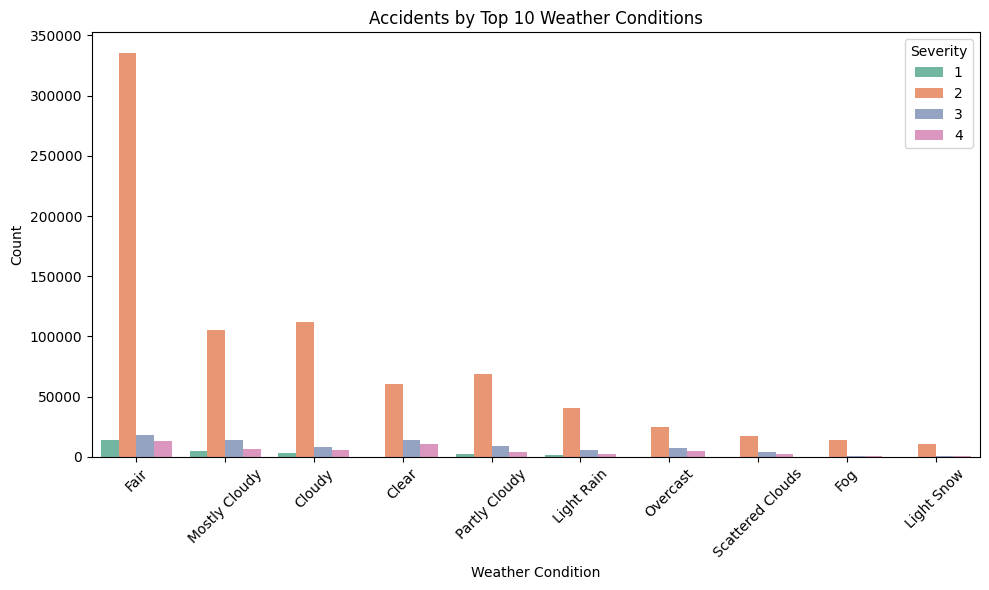

In [65]:
top_weather = df['Weather_Condition'].value_counts().head(10).index
filtered_df = df[df['Weather_Condition'].isin(top_weather)]

plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_Condition', hue='Severity', data=filtered_df, order=top_weather, palette='Set2')
plt.title('Accidents by Top 10 Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../visuals/weatherCondition(top10).png') 
plt.show()


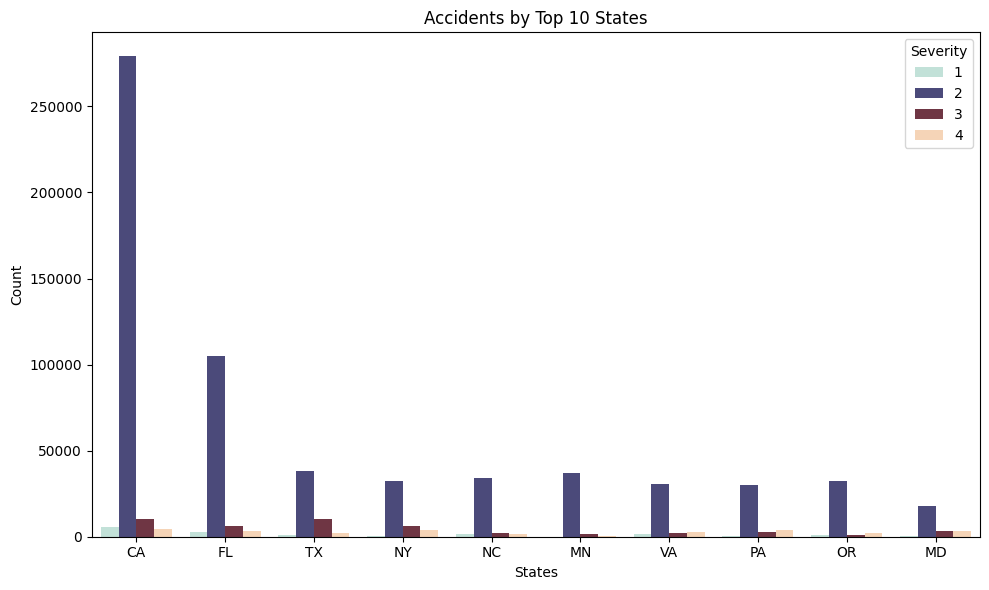

In [66]:
top_states = df['State'].value_counts().head(10).index
state_df = df[df['State'].isin(top_states)]

plt.figure(figsize=(10, 6))
sns.countplot(x='State', hue='Severity', data=state_df, order=top_states, palette='icefire')
plt.title('Accidents by Top 10 States')
plt.xlabel('States')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../visuals/States(top10).png') 
plt.show()

In [59]:

spearman_corr = df.corr(method='spearman', numeric_only=True)
print(spearman_corr['Severity'].sort_values(ascending=False))


Severity             1.000000
Distance(mi)         0.153334
Start_Lng            0.135587
Start_Lat            0.116089
Pressure(in)         0.071416
Wind_Speed(mph)      0.070939
Junction             0.043525
Humidity(%)          0.021516
Precipitation(in)    0.020490
Temperature(F)       0.010100
Weekday              0.006095
Give_Way             0.004303
Traffic_Calming      0.000612
Roundabout          -0.000729
Bump                -0.001731
Visibility(mi)      -0.001965
Amenity             -0.002046
Hour                -0.004874
No_Exit             -0.005330
Stop                -0.006666
Railway             -0.006956
Station             -0.010364
Day                 -0.014288
Wind_Chill(F)       -0.049445
Traffic_Signal      -0.058575
Crossing            -0.085810
Month               -0.131018
Name: Severity, dtype: float64


In [67]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print(categorical_cols)

['Side', 'City', 'County', 'State', 'Timezone', 'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


In [68]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
for colmn in categorical_cols:
    df[colmn] = enc.fit_transform(df[colmn])

In [69]:
numeric_cols = ['Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 
       'Precipitation(in)']

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['Severity', 'Start_Time'], axis=1)
y = df['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scale = StandardScaler()
X_train_scaled[numeric_cols] = scale.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scale.transform(X_test[numeric_cols])

Step 4: Model Building

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_LR = LogisticRegression(max_iter=5000)
model_LR.fit(X_train_scaled, y_train)
y_pred_lr = model_LR.predict(X_test_scaled)

d:\Traffic-Accident-Severity-Prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8312103324308731
Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.08      0.14      5487
           2       0.83      1.00      0.91    168239
           3       0.50      0.02      0.04     17946
           4       0.41      0.03      0.05     11107

    accuracy                           0.83    202779
   macro avg       0.60      0.28      0.28    202779
weighted avg       0.78      0.83      0.76    202779



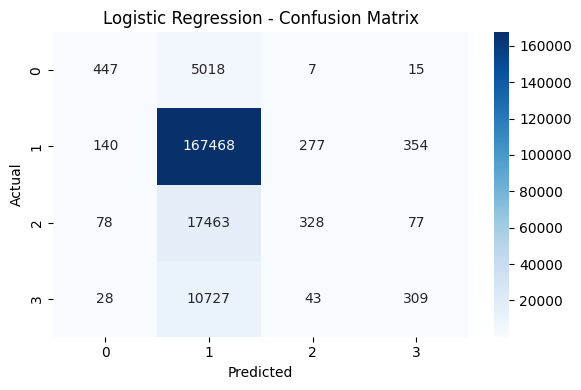

In [76]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("../visuals/logistic_regression_confusion.png")
plt.show()

In [77]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

In [78]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9035057870884066
Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.67      0.74      5487
           2       0.92      0.98      0.95    168239
           3       0.78      0.51      0.61     17946
           4       0.75      0.53      0.62     11107

    accuracy                           0.90    202779
   macro avg       0.82      0.67      0.73    202779
weighted avg       0.90      0.90      0.90    202779



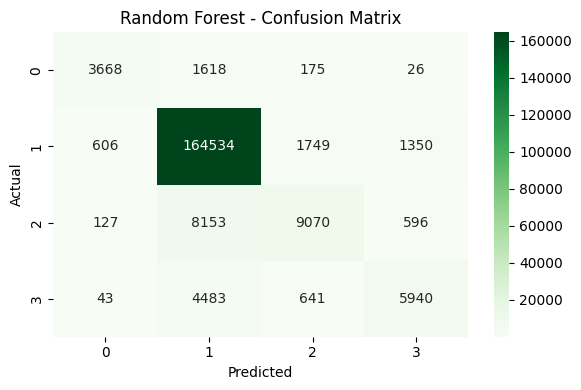

In [79]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("../visuals/random_forest_confusion.png")
plt.show()

In [80]:
importances = model_rf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

C:\Users\hp\AppData\Local\Temp\ipykernel_2644\1754658567.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='coolwarm')


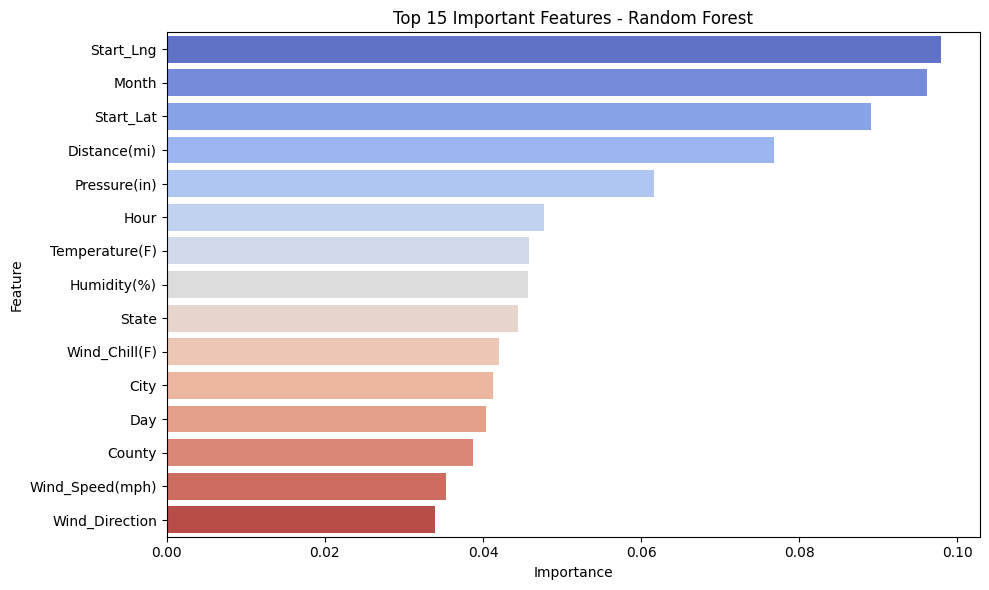

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='coolwarm')
plt.title("Top 15 Important Features - Random Forest")
plt.tight_layout()
plt.savefig("../visuals/random_forest_feature_importance.png")
plt.show()

In [83]:
y_train_adj = y_train - 1
y_test_adj = y_test - 1

from xgboost import XGBClassifier

model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_xgb.fit(X_train, y_train_adj)
y_pred_xgb = model_xgb.predict(X_test)

d:\Traffic-Accident-Severity-Prediction\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:10:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [84]:
y_pred_xgb += 1
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8772062195789505
Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.47      0.58      5487
           2       0.90      0.98      0.94    168239
           3       0.68      0.37      0.48     17946
           4       0.68      0.36      0.47     11107

    accuracy                           0.88    202779
   macro avg       0.75      0.55      0.62    202779
weighted avg       0.86      0.88      0.86    202779



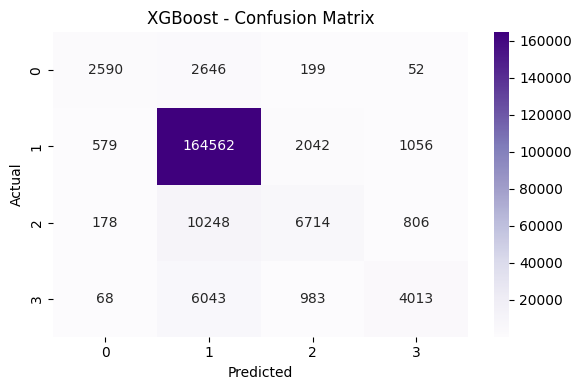

In [85]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Purples')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("../visuals/xgboost_confusion.png")
plt.show()

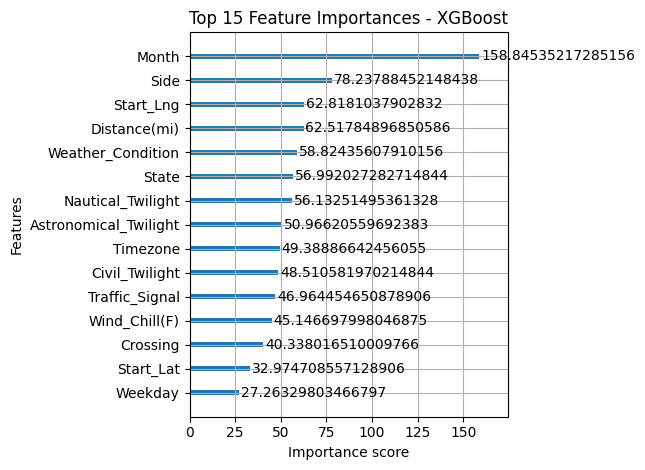

In [89]:
from xgboost import plot_importance

plot_importance(model_xgb, max_num_features=15, importance_type='gain')
plt.title("Top 15 Feature Importances - XGBoost")
plt.tight_layout()
plt.savefig("../visuals/xgboost_feature_importance.png")
plt.show()